In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
df_customer = pd.read_csv('datasets/customers.csv')
df_credit = pd.read_csv('datasets/credit_profiles.csv')
df_transaction = pd.read_csv('datasets/transactions.csv')

### Customer data

In [86]:
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [87]:
df_customer.shape

(1000, 8)

### Credit score

In [88]:
df_credit.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


### Transaction data

In [89]:
df_transaction.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


----------------------------------------------------------------------------------

In [90]:
df_customer.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


## Check Null values of customer 

In [91]:
df_customer.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [92]:
occupations = df_customer.occupation.unique()
occupations

array(['Business Owner', 'Consultant', 'Freelancer',
       'Fullstack Developer', 'Accountant', 'Data Scientist', 'Artist'],
      dtype=object)

In [93]:
median_income_by_occupation = df_customer.groupby('occupation').annual_income.median()
median_income_by_occupation

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [94]:
df_customer.annual_income = df_customer.apply( lambda x :median_income_by_occupation[x['occupation']] if pd.isnull(x['annual_income']) else x['annual_income'], axis=1 )

In [95]:
df_customer.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

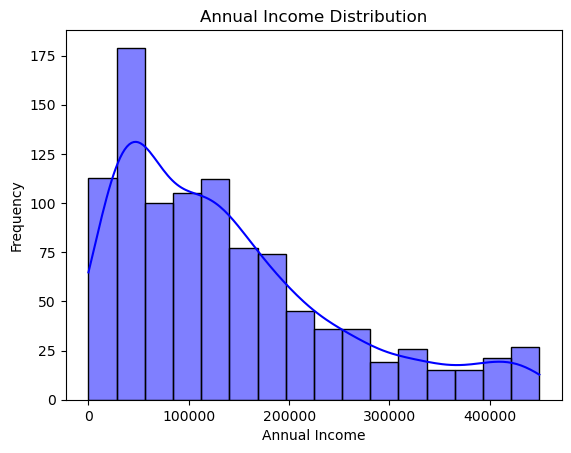

In [96]:
plt.Figure(figsize=(5,5))
sns.histplot(df_customer.annual_income,kde=True,color='blue')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

## Check Outliyers of customer table - annual income

In [97]:
df_customer.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


This section addresses potential outliers in the `annual_income` feature within the customer dataset. Based on the assumption that a valid annual income should be at least $100, any records with `annual_income` below this threshold are flagged as outliers.



In [98]:
df_customer[df_customer.annual_income < 100 ]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [99]:
df_customer.annual_income = df_customer.apply( lambda x :median_income_by_occupation[x['occupation']] if x.annual_income < 100  else x.annual_income, axis=1 )

In [100]:
df_customer[df_customer.annual_income < 100 ].shape[0]

0

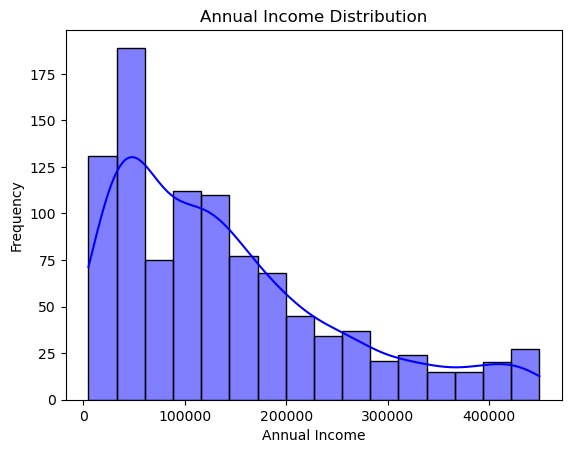

In [101]:
plt.Figure(figsize=(5,5))
sns.histplot(df_customer.annual_income,kde=True,color='blue')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

## Check Outliyers of customer table - age

In [102]:
df_customer.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


In [103]:
df_customer[(df_customer.age < 15) | (df_customer.age > 80)].shape[0]

20

In [104]:
median_age_by_occupation = df_customer.groupby('occupation').age.median()
median_age_by_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [105]:
df_customer.age = df_customer.apply(lambda x: median_age_by_occupation[x.occupation] if (x.age < 15) | (x.age > 80) else x.age, axis=1)

In [106]:
df_customer.age.describe()

count    1000.000000
mean       35.541500
std        12.276634
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

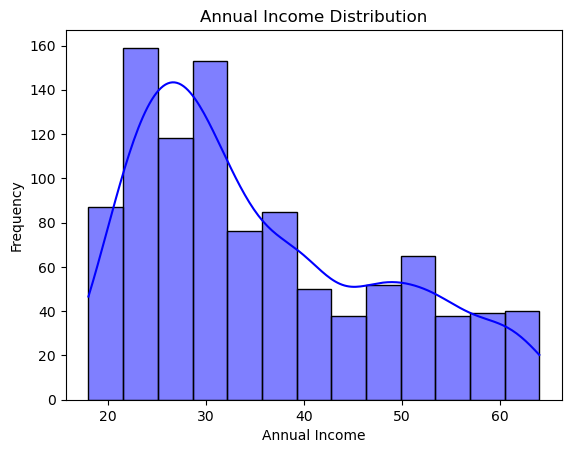

In [107]:
plt.Figure(figsize=(5,5))
sns.histplot(df_customer.age,kde=True,color='blue')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

Credit_score table

In [108]:
df_credit.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [109]:
df_credit.shape , df_customer.shape

((1004, 6), (1000, 8))

In [110]:
df_credit.cust_id.duplicated(keep=False).sum()

np.int64(8)

In [111]:
df_credit[df_credit.cust_id.duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [112]:
df_credit.drop_duplicates(subset='cust_id',keep='last',inplace=True)
df_credit.shape 

(1000, 6)

In [113]:
df_credit.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [114]:
df_credit.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

/tmp/ipykernel_1433896/2430408153.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


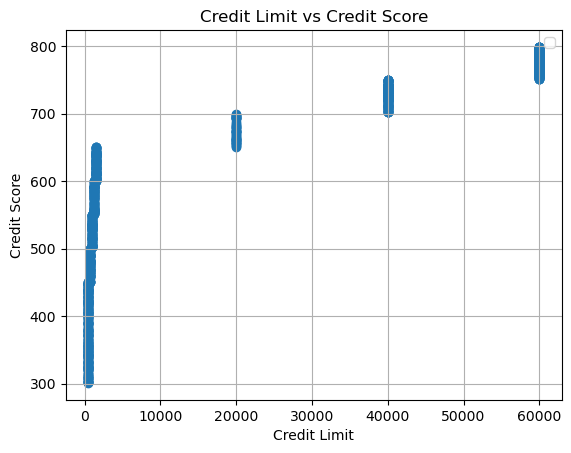

In [115]:
plt.scatter(df_credit.credit_limit, df_credit.credit_score)
plt.title('Credit Limit vs Credit Score')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')
plt.grid()
plt.legend()
plt.show()

In [116]:
df_credit.credit_score.describe()

count    1000.000000
mean      589.182000
std       152.284929
min       300.000000
25%       460.000000
50%       601.500000
75%       738.000000
max       799.000000
Name: credit_score, dtype: float64

In [117]:
bin_range = [300,450,500,550,600,650,700,750,800]

bin_labels = ['300-449','450-499','500-549','550-599','600-649','650-699','700-749','750-800']

df_credit['credit_score_range'] = pd.cut(df_credit.credit_score, bins=bin_range, labels=bin_labels, right=False)

In [118]:
df_credit.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [119]:
df_credit[df_credit.credit_score_range=="700-749"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
6,7,747,0.523965,15544.0,4.0,40000.0,700-749
16,17,702,0.894423,18444.0,0.0,40000.0,700-749
27,28,729,0.149748,3453.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-749
970,967,739,0.845474,23929.0,4.0,40000.0,700-749
991,988,739,0.435891,9283.0,4.0,40000.0,700-749
994,991,709,0.718484,15473.0,4.0,40000.0,700-749


In [120]:
mode_df_credit = df_credit.groupby('credit_score_range').credit_limit.apply(lambda x: x.mode())
mode_df_credit

/tmp/ipykernel_1433896/4132620736.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_df_credit = df_credit.groupby('credit_score_range').credit_limit.apply(lambda x: x.mode())


credit_score_range   
300-449             0      500.0
450-499             0      750.0
500-549             0     1000.0
550-599             0     1250.0
600-649             0     1500.0
650-699             0    20000.0
700-749             0    40000.0
750-800             0    60000.0
Name: credit_limit, dtype: float64

In [121]:
df_credit.credit_limit = df_credit.apply(lambda x:mode_df_credit[x.credit_score_range] if pd.isnull(x.credit_limit) else x.credit_limit, axis=1)

In [122]:
df_credit.isnull().sum() 

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
dtype: int64

In [123]:
df_credit.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [124]:
df_credit['credit_limit'] = df_credit['credit_limit'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df_credit['credit_limit'] = pd.to_numeric(df_credit['credit_limit'], errors='coerce')

In [125]:
df_credit.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19235.561497
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1250.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


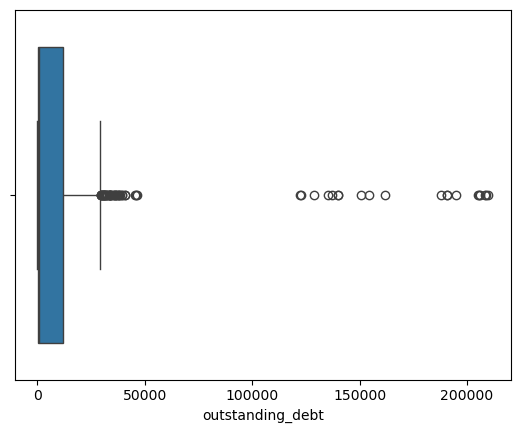

In [126]:
sns.boxplot(x=df_credit.outstanding_debt)
plt.show()

In [127]:
df_credit[df_credit.outstanding_debt > df_credit.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
19,20,647,0.439132,205014.0,3.0,1500.0,600-649
25,26,758,0.250811,190838.0,2.0,60000.0,750-800
38,39,734,0.573023,122758.0,3.0,40000.0,700-749
93,94,737,0.739948,137058.0,2.0,40000.0,700-749
204,205,303,0.364360,187849.0,0.0,500.0,300-449
271,272,703,0.446886,154568.0,1.0,40000.0,700-749
330,331,799,0.363420,208898.0,4.0,60000.0,750-800
350,351,320,0.285081,150860.0,0.0,500.0,300-449
446,447,754,0.178394,206191.0,2.0,60000.0,750-800


In [128]:
df_credit[df_credit.outstanding_debt > df_credit.credit_limit].shape[0]

18

In [129]:
df_credit.outstanding_debt = df_credit.apply(lambda x: x.credit_limit if x.outstanding_debt > x.credit_limit else x.outstanding_debt, axis=1)

In [130]:
df_credit[df_credit.outstanding_debt > df_credit.credit_limit].shape[0]

0

## Bivariate Analysis

In [131]:
df_credit.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [132]:
df_merge = df_customer.merge(df_credit, on='cust_id', how='inner')
df_merge.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,544,0.854807,513.0,4.0,1000.0,500-549
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,504,0.336938,224.0,2.0,1000.0,500-549
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,708,0.586151,18090.0,2.0,40000.0,700-749


In [133]:
numerical_columns = ['age', 'annual_income', 'credit_score', 'credit_limit', 'outstanding_debt','credit_utilisation']

correlation_matrix = df_merge[numerical_columns].corr()
correlation_matrix

,age,annual_income,credit_score,credit_limit,outstanding_debt,credit_utilisation
age,1.000000,0.619037,0.444917,0.518326,0.408891,-0.027713
annual_income,0.619037,1.000000,0.575751,0.682402,0.475405,-0.086368
credit_score,0.444917,0.575751,1.000000,0.844279,0.584742,-0.070445
credit_limit,0.518326,0.682402,0.844279,1.000000,0.813659,-0.084046
outstanding_debt,0.408891,0.475405,0.584742,0.813659,1.000000,0.143456
credit_utilisation,-0.027713,-0.086368,-0.070445,-0.084046,0.143456,1.000000


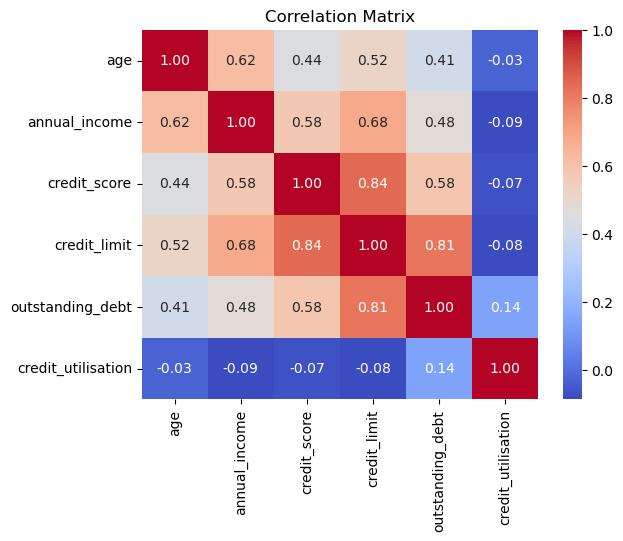

In [134]:
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Credit Score & Credit Limit (0.84)

Credit Limit & Outstanding Debt (0.81)

Annual Income & Credit Limit (0.68)

Annual Income & Age (0.62)

Annual Income & Credit Score (0.58)

Credit Score & Outstanding Debt (0.58)

# Transaction Table

In [135]:
df_transaction.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [136]:
df_transaction.shape

(500000, 7)

In [137]:
df_transaction.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [138]:
df_transaction.platform.unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

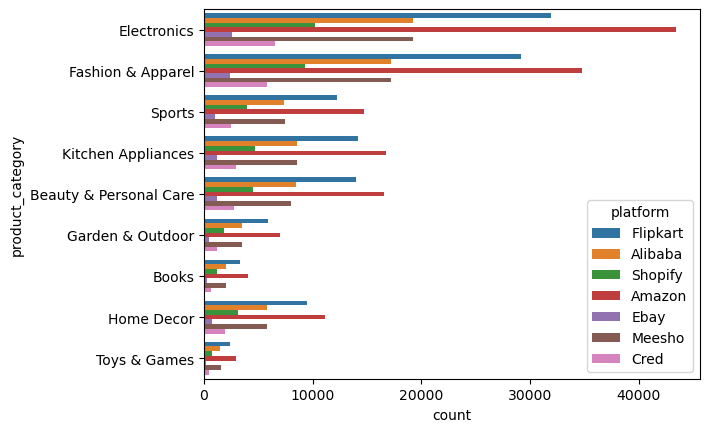

In [139]:
sns.countplot(y='product_category', data=df_transaction,hue='platform')
plt.show()

In [140]:
amazon_mode = df_transaction.platform.mode()[0]
amazon_mode

'Amazon'

In [141]:
df_transaction.fillna({'platform': amazon_mode}, inplace=True)

In [142]:
df_transaction.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [143]:
df_transaction.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [144]:
zero_tran = df_transaction[df_transaction.tran_amount==0]
zero_tran.shape[0]

4734

In [145]:
zero_tran.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [146]:
zero_tran.product_category.unique()[0],zero_tran.platform.unique()[0],zero_tran.payment_type.unique()[0]

('Electronics', 'Amazon', 'Credit Card')

In [147]:
df_trans_1 = df_transaction[(df_transaction.product_category=="Electronics") &
               (df_transaction.platform=="Amazon") &
               (df_transaction.payment_type=="Credit Card")]
df_trans_1

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card
499885,499886,520,2023-09-05,643,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [148]:
median_to_replace = df_trans_1[df_trans_1.tran_amount > 0].tran_amount.median()
median_to_replace

554.0

In [149]:
df_transaction.tran_amount.replace(0,median_to_replace, inplace=True)
df_transaction.describe()

/tmp/ipykernel_1433896/307769705.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_transaction.tran_amount.replace(0,median_to_replace, inplace=True)


,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711634,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


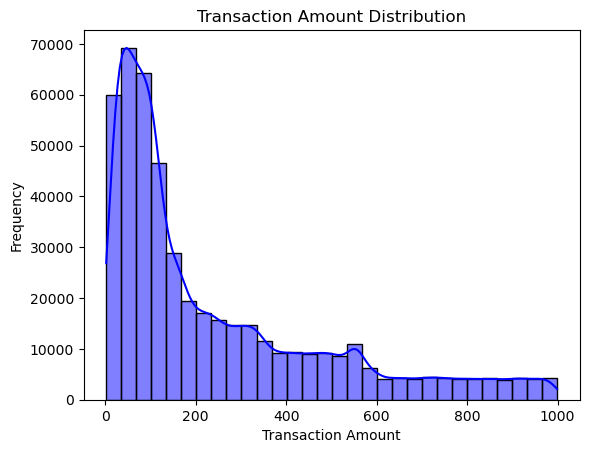

In [150]:
sns.histplot(df_transaction[df_transaction.tran_amount < 10000].tran_amount,color='blue',bins=30,kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [151]:
q1,q3 = df_transaction.tran_amount.quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound, upper_bound

(-454.5, 933.5)

In [152]:
tran_outliers = df_transaction[df_transaction.tran_amount > upper_bound].shape[0]
tran_outliers

33225

In [153]:
df_trans_normal = df_transaction[df_transaction.tran_amount < upper_bound]
df_trans_normal.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [154]:
category_mean = df_trans_normal.groupby('product_category').tran_amount.mean()
category_mean

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               478.776125
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [155]:
df_transaction.tran_amount = df_transaction.tran_amount.where(df_transaction.tran_amount <= upper_bound, df_transaction.product_category.map(category_mean))

In [156]:
df_transaction.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,232.225125
std,144337.711634,288.641924,224.474109
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,64.553463
50%,250000.500000,502.000000,133.000000
75%,375000.250000,752.000000,349.000000
max,500000.000000,1000.000000,933.000000


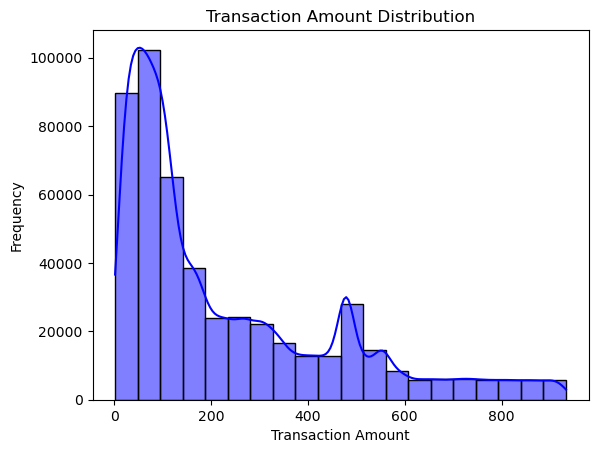

In [157]:
sns.histplot(df_transaction.tran_amount,color='blue',bins=20,kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# OutCome

In [158]:
df_merge.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,544,0.854807,513.0,4.0,1000.0,500-549
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,504,0.336938,224.0,2.0,1000.0,500-549
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,708,0.586151,18090.0,2.0,40000.0,700-749


In [159]:
labels = ['18-25', '26-48', '49-65']
df_merge['age_group'] = pd.cut(df_merge.age, bins=[18, 25, 48, 65], labels=labels, right=False)
df_merge.head()


,cust_id,name,gender,age,location,occupation,annual_income,marital_status,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,749,0.585171,19571.0,0.0,40000.0,700-749,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,587,0.107928,1250.0,2.0,1250.0,550-599,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,544,0.854807,513.0,4.0,1000.0,500-549,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,504,0.336938,224.0,2.0,1000.0,500-549,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,708,0.586151,18090.0,2.0,40000.0,700-749,49-65


In [160]:
df_transaction.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


In [161]:
df_merge_1 = pd.merge(df_merge,df_transaction,on='cust_id')
df_merge_1.shape

(500000, 21)

In [162]:
df_merge_1.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,credit_score,credit_utilisation,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,age_group,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,749,0.585171,...,0.0,40000.0,700-749,49-65,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,749,0.585171,...,0.0,40000.0,700-749,49-65,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,749,0.585171,...,0.0,40000.0,700-749,49-65,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,749,0.585171,...,0.0,40000.0,700-749,49-65,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,749,0.585171,...,0.0,40000.0,700-749,49-65,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


In [163]:
payment_distribution = df_merge_1[['age_group','payment_type']].value_counts().reset_index(name='count')
payment_distribution,type(payment_distribution)

(   age_group payment_type  count
 0      26-48  Credit Card  96855
 1      26-48      Phonepe  78252
 2      26-48         Gpay  61720
 3      18-25      Phonepe  40711
 4      49-65  Credit Card  35449
 5      26-48   Debit Card  31683
 6      26-48  Net Banking  28179
 7      18-25         Gpay  27290
 8      49-65      Phonepe  25265
 9      49-65         Gpay  20208
 10     18-25   Debit Card  17670
 11     49-65   Debit Card  10147
 12     49-65  Net Banking  10146
 13     18-25  Credit Card   7474
 14     18-25  Net Banking   4898
 15     26-48         Cash   2648
 16     49-65         Cash    937
 17     18-25         Cash    468,
 pandas.core.frame.DataFrame)

In [164]:
product_category = df_merge_1[['age_group', 'product_category']].value_counts().reset_index(name='count')
product_category

,age_group,product_category,count
0,26-48,Electronics,78230
1,26-48,Fashion & Apparel,62772
2,26-48,Kitchen Appliances,41070
3,18-25,Fashion & Apparel,34095
4,26-48,Beauty & Personal Care,31124
5,18-25,Electronics,30184
6,26-48,Sports,29671
7,26-48,Home Decor,27253
8,49-65,Electronics,26121
9,49-65,Fashion & Apparel,20025


In [165]:
# platform = df_merge_1.groupby('age_group')['platform'].value_counts().reset_index(name='count') 
platform = df_merge_1[['age_group', 'platform']].value_counts().reset_index(name='count')
platform

,age_group,platform,count
0,26-48,Amazon,93517
1,26-48,Flipkart,73663
2,26-48,Alibaba,44063
3,26-48,Meesho,43674
4,49-65,Amazon,31959
5,18-25,Amazon,30908
6,49-65,Flipkart,25021
7,18-25,Flipkart,23976
8,26-48,Shopify,23695
9,49-65,Meesho,15100


/tmp/ipykernel_1433896/2918528807.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_age = df_merge.groupby('age_group')['annual_income'].mean()


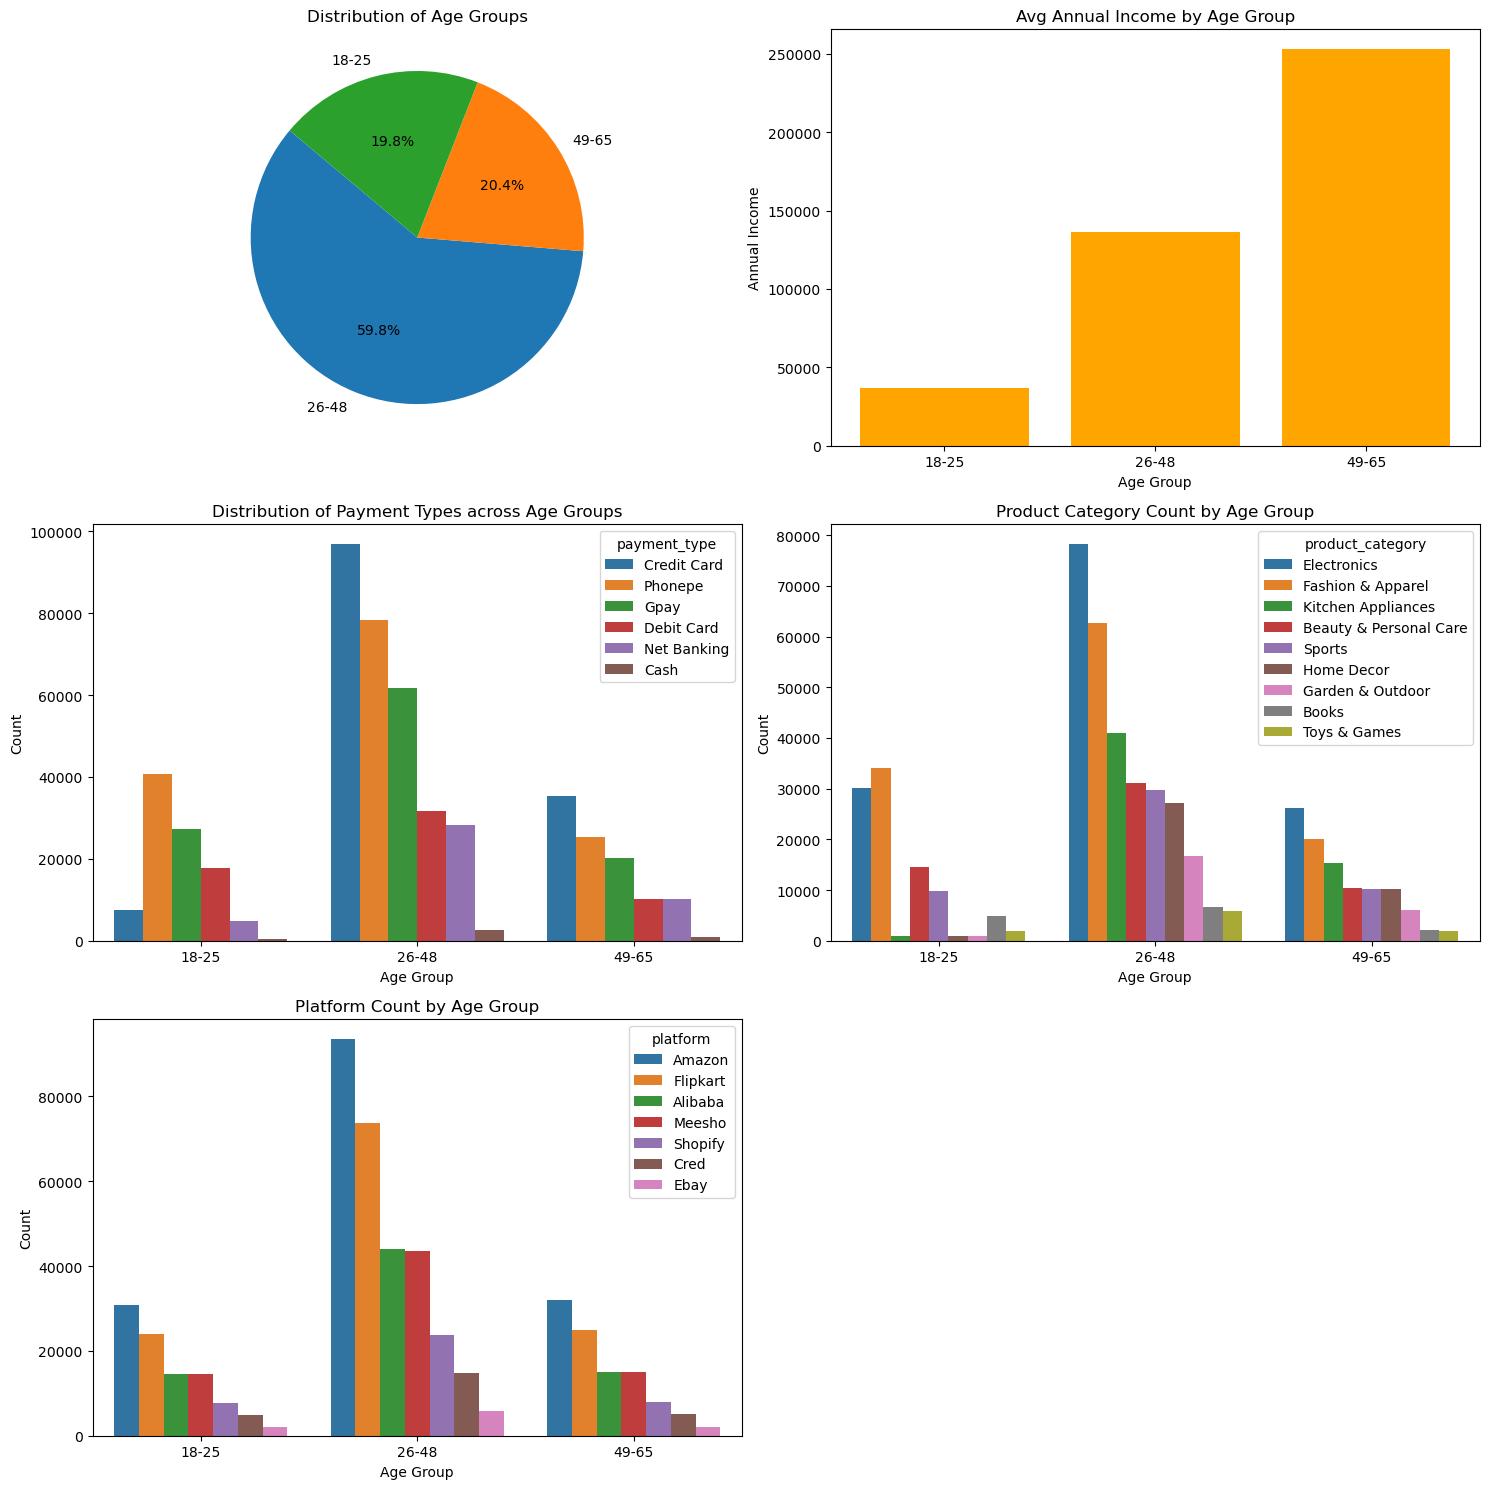

In [166]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3 rows x 2 columns

# --- 1. Pie Chart: Age Group Distribution ---
age_counts = df_merge['age_group'].value_counts()
axs[0, 0].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Distribution of Age Groups')

# --- 2. Bar Chart: Avg Annual Income by Age Group ---
income_by_age = df_merge.groupby('age_group')['annual_income'].mean()
axs[0, 1].bar(income_by_age.index, income_by_age.values, color='orange')
axs[0, 1].set_title('Avg Annual Income by Age Group')
axs[0, 1].set_xlabel('Age Group')
axs[0, 1].set_ylabel('Annual Income')

# --- 3. Payment Type Count ---
sns.barplot(data=payment_distribution, x='age_group', y='count', hue='payment_type', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Payment Types across Age Groups')
axs[1, 0].set_xlabel('Age Group')
axs[1, 0].set_ylabel('Count')

# --- 4. Product Category Count ---
sns.barplot(data=product_category, x='age_group', y='count', hue='product_category', ax=axs[1, 1])
axs[1, 1].set_title('Product Category Count by Age Group')
axs[1, 1].set_xlabel('Age Group')
axs[1, 1].set_ylabel('Count')

# --- 5. Platform Count ---
sns.barplot(data=platform, x='age_group', y='count', hue='platform', ax=axs[2, 0])
axs[2, 0].set_title('Platform Count by Age Group')
axs[2, 0].set_xlabel('Age Group')
axs[2, 0].set_ylabel('Count')

# Hide last subplot if unused
axs[2, 1].axis('off')

# Final layout
plt.tight_layout()
plt.show()

### We Decided to target 18-25 age group because it is nich martet with less competition
### Eventhough this age group currently use fewer transaction so no many credit card caompanies not focusing on them
### We have a oppotunity to attract then early
### If we build connection with them they stay loyal with our brand 

# In the long run, this age group can become valuebale customers 